In [1]:
import numpy as np
import torch
import pyro
import pyro.distributions as dist
from torch import nn
from pyro.nn import PyroModule
from pyro.nn import PyroSample
import matplotlib.pyplot as plt

In [2]:
assert issubclass(PyroModule[nn.Conv2d], nn.Conv2d)
assert issubclass(PyroModule[nn.Conv2d], PyroModule)

In [3]:
size = 3
convolutions = PyroModule[nn.Conv2d](in_channels=1, out_channels=1, kernel_size=size, stride=1, padding=1)

In [4]:
convolutions.weight = PyroSample(dist.Normal(0., 1.).expand([1,1,size,size]).to_event(2))

In [5]:
w = h = 50
#foo = torch.randn(w,h)
foo = torch.zeros((w,h))
foo[10:14,3:9] = 1
foo[34,3:9] = 1
foo[23,30] = 1
#convolutions.weight = torch.eye(5,5).view(1,1,5,5)
bar = convolutions(foo.view(1,1,w,h))

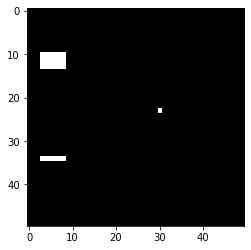

In [6]:
plt.imshow(foo,cmap='gray')

In [7]:
convolutions.weight.shape

torch.Size([1, 1, 3, 3])

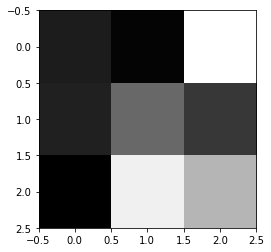

In [8]:
plt.imshow(torch.squeeze(convolutions.weight).detach().numpy(),cmap='gray')

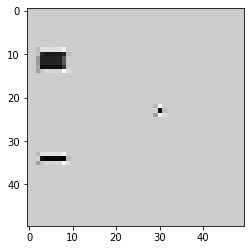

In [9]:
plt.imshow(torch.squeeze(bar).detach().numpy(),cmap='gray')